In [1]:
import cv2
import numpy as np
from commonFunctions import *
# import io
import io 

In [32]:
def shadow_removalDialate(img):
    # img2 = cv2.imread(f'../Dataset_0-5/men/{num}/4_men (49).JPG')
    img2 = cv2.resize(img, (256, 256))
    
    img_hls = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)

    # define lower and upper bounds for blue color in HLS format
    lower_blue = np.array([0, 0, 60])
    upper_blue = np.array([20, 255, 255])

    # create a mask for blue color in HLS format
    mask = cv2.inRange(img_hls, lower_blue, upper_blue)
    # daialation
    kernel = np.ones((3,3),np.uint8)
    mask = cv2.dilate(mask,kernel,iterations = 8)
    # apply the mask to the original image
    result = cv2.bitwise_and(img2, img2, mask=mask)
    show_images([img2, mask, result], ["Original Image", "dialation", "masked"])
    io.imshow(img2)
    return result

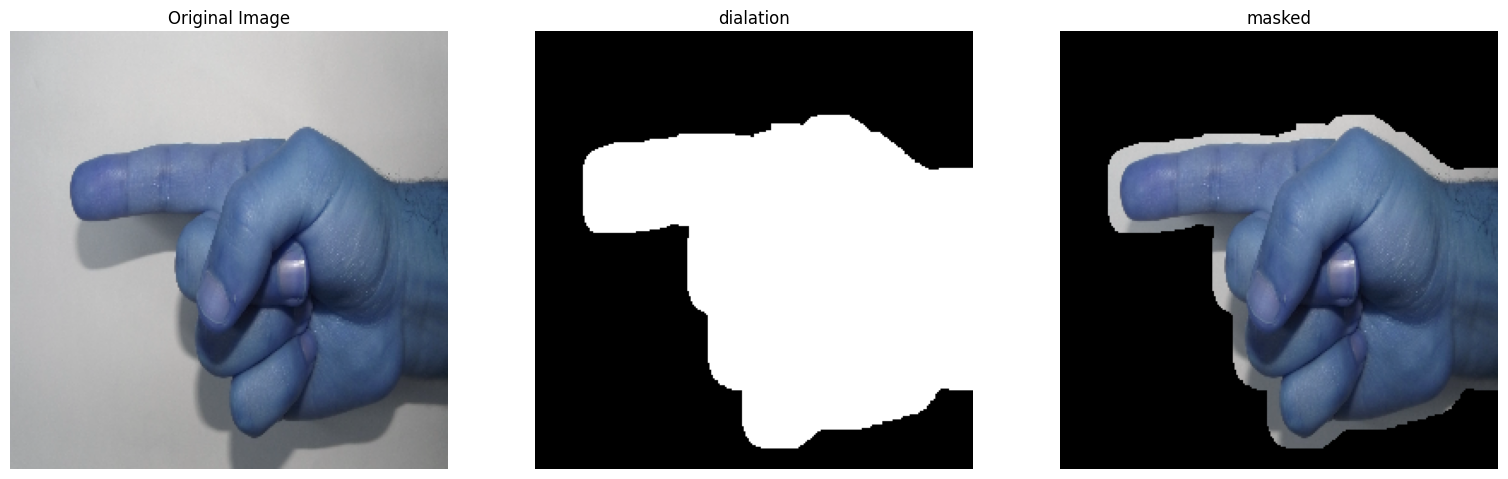

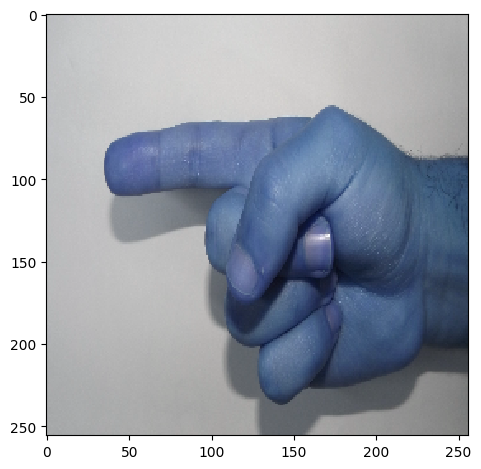

In [33]:
img2 = cv2.imread('../Dataset_0-5/men/1/1_men (2).JPG')
img2 = cv2.resize(img2, (256, 256))
result_image=shadow_removalDialate(img2)

In [43]:
def preprocessing(img,img2):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance contrast and remove lighting effects
    equalized = cv2.equalizeHist(gray)
    io.imshow(equalized)
    # # Find the contours of the binary image
    contours, hierarchy = cv2.findContours(equalized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)

    # # Draw the largest contour on the original image
    cv2.drawContours(img2, [max_contour], 0, (0, 255, 0), 2)
    io.imshow(img2)
    # # Show the image with the largest contour drawn
    # # Create a bounding box around the hand
    x, y, w, h = cv2.boundingRect(max_contour)

    # # Crop the image to the bounding box around the hand
    hand = equalized[y:y+h, x:x+w]
    img3 = cv2.resize(hand, (256, 256))
    io.imshow(img3)

    return img3

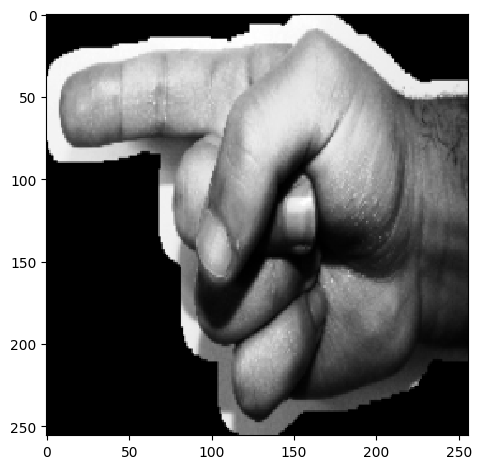

In [37]:

# # Convert the image to grayscale
# gray = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)

# # Apply histogram equalization to enhance contrast and remove lighting effects
# equalized = cv2.equalizeHist(gray)
# io.imshow(equalized)

# # # Apply thresholding to the image to make it binary
# # _, binary = cv2.threshold(equalized, 127, 255, cv2.THRESH_BINARY_INV)

# # # Apply top-hat transform to remove finger shadows
# # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
# # tophat = cv2.morphologyEx(binary, cv2.MORPH_TOPHAT, kernel)

# # Apply Gaussian blur to remove noise
# # blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
# # io.imshow(blurred)
# # # Find the contours of the binary image
# contours, hierarchy = cv2.findContours(equalized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# # sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
# # max_contour = sorted_contours[0]
# # # Find the largest contour (i.e. the hand) by area
# max_contour = max(contours, key=cv2.contourArea)

# # # Draw the largest contour on the original image
# cv2.drawContours(img2, [max_contour], 0, (0, 255, 0), 2)
# io.imshow(img2)
# # # Show the image with the largest contour drawn
# # cv2.imshow("Image with Largest Contour", img)
# # cv2.waitKey(0)

# # # Create a bounding box around the hand
# x, y, w, h = cv2.boundingRect(max_contour)

# # # Crop the image to the bounding box around the hand
# hand = equalized[y:y+h, x:x+w]
# img2 = cv2.resize(hand, (256, 256))
# io.imshow(img2)

# # # Resize the image to a fixed size (e.g. 28x28) for consistency
# # resized_hand = cv2.resize(hand, (28, 28))
# # # Invert the image (to match the format used by MNIST, a commonly used dataset of handwritten digits)
# # inverted_hand = 255 - resized_hand

# # # Normalize the image to values between 0 and 1
# # normalized_hand = inverted_hand.astype(np.float32) / 255.0

# # # Flatten the image into a 1D array
# # flattened_hand = normalized_hand.flatten()


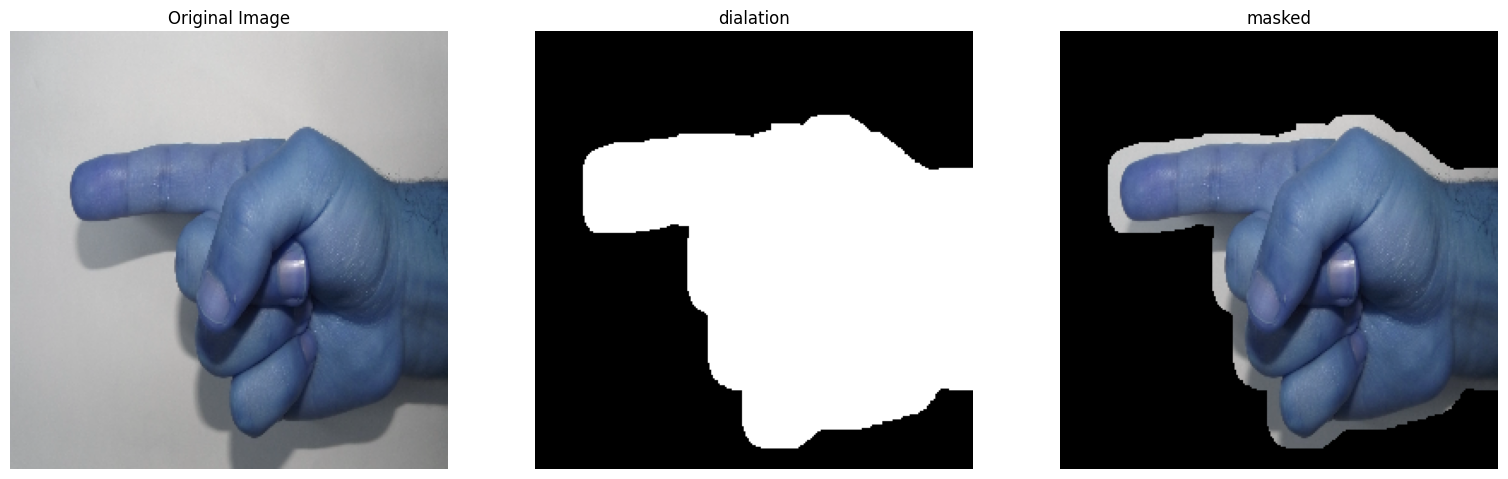

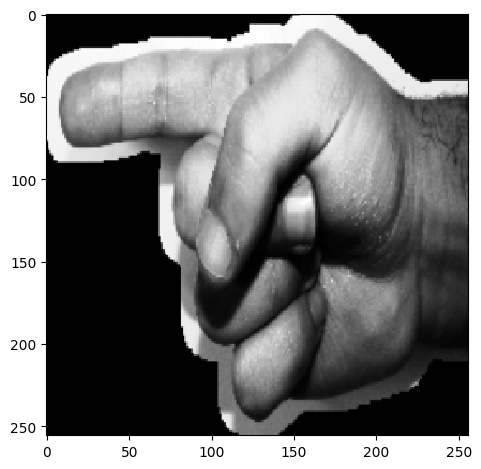

In [45]:
img2 = cv2.imread('../Dataset_0-5/men/1/1_men (2).JPG')
img2 = cv2.resize(img2, (256, 256))
result_image=shadow_removalDialate(img2)
preprocessed_image=preprocessing(result_image,img2)
io.imshow(preprocessed_image)